In [1]:
import numpy as np
import pandas as pd
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from tensorflow.keras.models import Sequential, Model # Functional API
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization

In [3]:
train = pd.read_csv('/Users/shanolulu/Desktop/Untitled Folder/dataset/titanic_train.csv')
test = pd.read_csv('/Users/shanolulu/Desktop/Untitled Folder/dataset/titanic_test.csv')

In [4]:
df = pd.concat([train, test], sort=False) # sort=False: 경고를 받지 않고 정렬하지 않음
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
y_test = test[['PassengerId']]
y_test

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


## 데이터 전처리

In [6]:
# 1. 사용할 columns을 선정한다.
train = train[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']]
test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']]

In [7]:
train.count()

Survived    891
Pclass      891
Sex         891
SibSp       891
Parch       891
Ticket      891
Fare        891
dtype: int64

In [8]:
# 2. Fill or remove missing values
train[train['Fare'] != 5].reset_index(drop=True) 
train[train['Fare'] != 0].reset_index(drop=True)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,0,3,male,1,0,A/5 21171,7.2500
1,1,1,female,1,0,PC 17599,71.2833
2,1,3,female,0,0,STON/O2. 3101282,7.9250
3,1,1,female,1,0,113803,53.1000
4,0,3,male,0,0,373450,8.0500
...,...,...,...,...,...,...,...
871,0,2,male,0,0,211536,13.0000
872,1,1,female,0,0,112053,30.0000
873,0,3,female,1,2,W./C. 6607,23.4500
874,1,1,male,0,0,111369,30.0000


In [9]:
# 3. 레이블을 인코딩 해준다. (숫자로 변경)
encoder_sex = LabelEncoder()
train['Sex'] = encoder_sex.fit_transform(train['Sex'].values)
test['Sex'] = encoder_sex.transform(test['Sex'].values)
train

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,0,3,1,1,0,A/5 21171,7.2500
1,1,1,0,1,0,PC 17599,71.2833
2,1,3,0,0,0,STON/O2. 3101282,7.9250
3,1,1,0,1,0,113803,53.1000
4,0,3,1,0,0,373450,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,0,0,211536,13.0000
887,1,1,0,0,0,112053,30.0000
888,0,3,0,1,2,W./C. 6607,23.4500
889,1,1,1,0,0,111369,30.0000


In [10]:
# 4. one-hot encoding
# get_dummies() : labelencoder는 같은 열에서 0,1,2,3... 으로 분류되는데 one-hotencoding은 다른 열로 분류되어 0, 1로 나눈다.
# SibSp
categories = set(df['SibSp'].unique())
train['SibSp'] = pd.Categorical(train['SibSp'], categories=categories)
test['SibSp'] = pd.Categorical(test['SibSp'], categories=categories)

train = pd.get_dummies(train, columns=['SibSp'])
test = pd.get_dummies(test, columns=['SibSp'])

# Parch
categories = set(df['Parch'].unique())
train['Parch'] = pd.Categorical(train['Parch'], categories=categories)
test['Parch'] = pd.Categorical(test['Parch'], categories=categories)

train = pd.get_dummies(train, columns=['Parch'])
test = pd.get_dummies(test, columns=['Parch'])

# Ticket
ticket_values = df['Ticket'].value_counts()
ticket_values = ticket_values[ticket_values > 1]
ticket_values = pd.Series(ticket_values.index, name='Ticket')
categories = set(ticket_values.tolist())
train['Ticket'] = pd.Categorical(train['Ticket'], categories=categories)
test['Ticket'] = pd.Categorical(test['Ticket'], categories=categories)

train = pd.get_dummies(train, columns=['Ticket'])
test = pd.get_dummies(test, columns=['Ticket'])

In [11]:
standard = StandardScaler()
train_std = pd.DataFrame(standard.fit_transform(train[['Pclass', 'Fare']].values), columns=['Pclass', 'Fare'])
train.loc[:,'Pclass'] = train_std['Pclass']
train.loc[:,'Fare'] = train_std['Fare']

test_std = pd.DataFrame(standard.transform(test[['Pclass', 'Fare']].values), columns=['Pclass', 'Fare'])
test.loc[:,'Pclass'] = test_std['Pclass']
test.loc[:,'Fare'] = test_std['Fare']

In [12]:
# 5. Fill or remove missing values
train.fillna({'Fare':0}, inplace=True)
test.fillna({'Fare':0}, inplace=True)

In [13]:
# 6. Split training data and test data
x_train = train.drop(columns='Survived')
y_train = train[['Survived']]
x_test = test
y_test = y_test

In [14]:
# 7. Create Model
def create_model(input_dim, activation='relu', optimizer='adam', out_dim=440, dropout=0.5):
    model = Sequential()
    # Input -> Hidden1
    model.add(Dense(input_dim=input_dim, units=out_dim))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout))
    # Hidden1 -> Hidden2
    model.add(Dense(units=out_dim))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout))
    # Hidden2 -> Hidden3
    model.add(Dense(units=out_dim))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout))
    # Hidden3 -> Output
    model.add(Dense(units=1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [15]:
model = create_model(len(x_train.columns), activation='relu', optimizer='adam', out_dim=702, dropout=0.5)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 702)               164970    
_________________________________________________________________
batch_normalization (BatchNo (None, 702)               2808      
_________________________________________________________________
activation (Activation)      (None, 702)               0         
_________________________________________________________________
dropout (Dropout)            (None, 702)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 702)               493506    
_________________________________________________________________
batch_normalization_1 (Batch (None, 702)               2808      
_________________________________________________________________
activation_1 (Activation)    (None, 702)               0

In [41]:
# 9. training

# ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).
# 위에서 train 데이터를 넣어 줄 떄 전처리 하기 전의 데이터를 사용하여 데이터 타입에 맞지 않은 데이터가 사용되어서 발생
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'], ) # 모델을 기계가 이해할 수 있도록 컴파일 합니다. 오차 함수와 최적화 방법, 메트릭 함수를 선택할 수 있습니다
r = model.fit(x_train, y_train, batch_size=16, epochs = 100, verbose=2, validation_data=(x_test, y_test)) # verbose 출력옵션

Epoch 1/100
56/56 - 1s - loss: 0.2933 - accuracy: 0.8934 - val_loss: 1706.8234 - val_accuracy: 0.0000e+00
Epoch 2/100
56/56 - 0s - loss: 0.2900 - accuracy: 0.8979 - val_loss: 1091.8196 - val_accuracy: 0.0000e+00
Epoch 3/100
56/56 - 0s - loss: 0.2622 - accuracy: 0.8945 - val_loss: 1276.6183 - val_accuracy: 0.0000e+00
Epoch 4/100
56/56 - 0s - loss: 0.2584 - accuracy: 0.8911 - val_loss: 697.0085 - val_accuracy: 0.0000e+00
Epoch 5/100
56/56 - 0s - loss: 0.2597 - accuracy: 0.8967 - val_loss: 1105.2026 - val_accuracy: 0.0000e+00
Epoch 6/100
56/56 - 0s - loss: 0.2656 - accuracy: 0.8822 - val_loss: 729.8766 - val_accuracy: 0.0000e+00
Epoch 7/100
56/56 - 0s - loss: 0.2734 - accuracy: 0.8967 - val_loss: 680.2820 - val_accuracy: 0.0000e+00
Epoch 8/100
56/56 - 0s - loss: 0.2494 - accuracy: 0.8934 - val_loss: 640.2708 - val_accuracy: 0.0000e+00
Epoch 9/100
56/56 - 0s - loss: 0.2698 - accuracy: 0.8889 - val_loss: 864.1004 - val_accuracy: 0.0000e+00
Epoch 10/100
56/56 - 0s - loss: 0.2644 - accuracy: 

Epoch 79/100
56/56 - 0s - loss: 0.2598 - accuracy: 0.8934 - val_loss: 557.3524 - val_accuracy: 0.0000e+00
Epoch 80/100
56/56 - 0s - loss: 0.2525 - accuracy: 0.8979 - val_loss: 816.7715 - val_accuracy: 0.0000e+00
Epoch 81/100
56/56 - 0s - loss: 0.2447 - accuracy: 0.9001 - val_loss: 963.4231 - val_accuracy: 0.0000e+00
Epoch 82/100
56/56 - 0s - loss: 0.2589 - accuracy: 0.8878 - val_loss: 434.9771 - val_accuracy: 0.0000e+00
Epoch 83/100
56/56 - 0s - loss: 0.2556 - accuracy: 0.8934 - val_loss: 995.2163 - val_accuracy: 0.0000e+00
Epoch 84/100
56/56 - 0s - loss: 0.2617 - accuracy: 0.8923 - val_loss: 775.3914 - val_accuracy: 0.0000e+00
Epoch 85/100
56/56 - 0s - loss: 0.2655 - accuracy: 0.8923 - val_loss: 705.6002 - val_accuracy: 0.0000e+00
Epoch 86/100
56/56 - 0s - loss: 0.2681 - accuracy: 0.8765 - val_loss: 1393.5769 - val_accuracy: 0.0000e+00
Epoch 87/100
56/56 - 0s - loss: 0.2722 - accuracy: 0.9001 - val_loss: 327.6880 - val_accuracy: 0.0000e+00
Epoch 88/100
56/56 - 0s - loss: 0.2492 - accu

In [42]:
# 10. predict
pred = model.predict(x_test)
# print(pred)
# 반 올림하여 정수형으로만 출력하여 생존 및 비생존으로 나눔
pred_round = np.round(pred).astype(int)
print(pred_round)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]


In [43]:
df_output = pd.concat([y_test, pd.DataFrame(pred_round, columns=['Survived'])], axis=1)

In [44]:
df_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
# 11. save csv

df_output.to_csv('/Users/shanolulu/Desktop/Untitled Folder/titanic_pred.csv', index=False)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

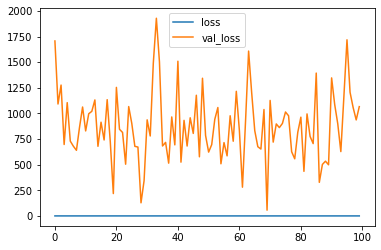

In [47]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

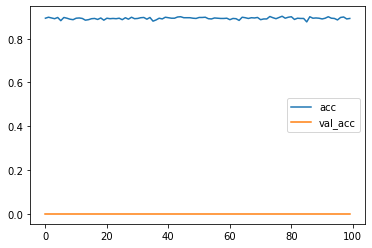

In [48]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [49]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1066.3059 - accuracy: 0.0000e+00


[1066.305908203125, 0.0]

In [50]:
prediction = model.predict(x_test)
prediction = prediction.flatten()
prediction[0]

0.08681694